In [0]:
pip install --upgrade tensorflow 

In [0]:
import tensorflow as tf
from tensorflow import keras
tf.keras.__version__

'2.2.4-tf'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/content/drive/My Drive/Colab Notebooks/jupyter_project
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6876 - binary_accuracy: 0.5350 - val_loss: 0.6893 - val_binary_accuracy: 0.5240
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6434 - binary_accuracy: 0.6405 - val_loss: 0.6402 - val_binary_accuracy: 0.6150
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5977 - binary_accuracy: 0.6785 - val_loss: 0.6216 - val_binary_accuracy: 0.6680
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5595 - binary_accuracy: 0.7125 - val_loss: 0.6011 - val_binary_accuracy: 0.6780
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5278 - binary_accuracy: 0.7260 - val_loss: 0.6124 - val_binary_accuracy: 0.6590
Epoch 6/30
100/100 [==============================] - 11s 113ms/s

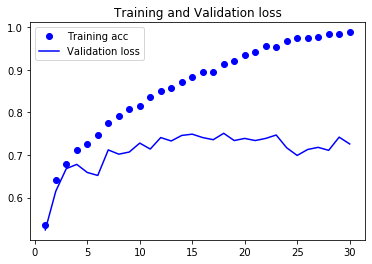

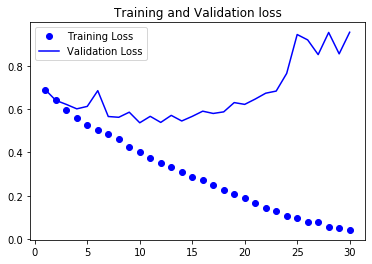

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil

currentPath = os.getcwd()
print(currentPath)
os.chdir('/content/drive/My Drive/Colab Notebooks/jupyter_project/')


'''
original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets'
# 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir = '/Users/jaekunpark/Dataset/CatDog/partial'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)
# 소규모 데이터셋을 저장할 디렉터리
'''


# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/train'

validation_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/validation'

test_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/test'


# 훈련용 고양이 사진 디렉터리
train_cats_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/train/cats'

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/train/dogs'


# 검증용 고양이 사진 디렉터리
validation_cats_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/validation/cats'

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/validation/dogs'

# 테스트용 고양이 사진 디렉터리
test_cats_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/test/cats'

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = '/content/drive/My Drive/Colab Notebooks/jupyter_project/Datasets/test/dogs'


'''
# 처음 1000개의 고양이 사진을 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 고양이 사진을 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 사진을 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1000개의 강아지 사진을 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 강아지 사진을 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 사진을 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''
#-------------------------------------------------------------------------------------------

# 강아지 vs 고양이 분류를 위한 소규모 ConvNet 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델의 훈련 설정
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['binary_accuracy'])

# 데이터 전처리 - (네트워크 주입 전 부동 소수 타입 텐서로 전처리) 
'''
ImageDataGenerator 클래스의 flow_from_directory() 메서드는 서브 디렉터리의 순서대로 레이블을 할당한다.
여기에서는 'datasets/partial/train' 디렉터리 아래 'cats'와 'dogs'가 순서대로 0, 1 레이블을 가진다.
즉 'dogs'가 target class가 되므로 최종 시그모이드의 출력은 강아지 이미지일 확률을 인코딩한다.
cf)flow_from_directory(classes=['dogs', 'cats'])처럼 하면 'cats'가 타깃 클래스가 된다.
'''
# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기

    # 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
    # 모든 이미지를 150*150 크기로 바꾸고, binary_crossentropy loss를 사용하므로 이진 레이블이 필요

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

# 배치 제네레이터를 사용하여 모델 훈련
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,
                             validation_data = validation_generator,  validation_steps = 50)
    # validation_generator의 배치가 20개로 지정되었으므로 전체 검증 데이터(1000개)를 사용하려면 validation_steps를 50으로 설정

# 모델 저장
model.save('cats_and_dogs_small_1.h5')

# 훈련의 정확도와 손실 그래프
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,  'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()